### problem Statement –

Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.


here target varible(column) risk weighting
Solution –

With our dashboards which are created using Power BI latest tools helps the company to make a decision based on the applicant’s profile like if the applicant is likely to repay the loan then approving the loan otherwise not.

In [27]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# MySQL Connection
cnx = mysql.connector.connect(
    host="127.0.0.1",
    port=3306,
    user="root",
    password="tkale@123",
    database="banking"       # use the correct database name
)

# SQL Query
query = "SELECT * FROM customer"   # OR banking.customer if needed

# Load into DataFrame
df = pd.read_sql(query, cnx)

df.head()


C:\Users\91898\AppData\Local\Temp\ipykernel_11844\4118794088.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, cnx)


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,06-05-2019,Anthony Torres,American,Safety Technician IV,High,Jade,...,1485828.64,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,10-12-2001,Jonathan Hawkins,African,Software Consultant,High,Jade,...,641482.79,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,25-01-2010,Anthony Berry,European,Help Desk Operator,High,Gold,...,1033401.59,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,28-03-2019,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,20-07-2012,Shawn Long,American,Assistant Professor,Mid,Platinum,...,487782.53,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5


In [28]:
df['Bank Loans'].head()

0     776242.92
1    1270615.43
2    1052715.84
3     121195.06
4    1048301.95
Name: Bank Loans, dtype: float64

1️⃣ Client ID

Customer ka unique identification number.

2️⃣ Name

Customer ka full name.

3️⃣ Age

Customer ki age (saal me).

4️⃣ Location ID

Customer kis area/city se belong karta hai uska code (India me PIN code jaisa).

5️⃣ Joined Bank

Customer ne bank ko kab join kiya / kab account open kiya.

6️⃣ Banking Contact

Customer bank se kis medium se connect hai (Phone/email/relationship manager).

7️⃣ Nationality

Customer ki nationality (Indian, American, etc).

8️⃣ Occupation

Customer ka job/profession (Engineer, Student, Businessman, etc).

9️⃣ Fee Structure

Customer kis type ki fee plan me aata hai (Standard, Premium, etc).

🔟 Loyalty Classification

Customer kitna loyal hai — High / Medium / Low (bank ke usage ke basis par).

1️⃣1️⃣ Estimated Income

Customer ki approx annual income.

1️⃣2️⃣ Superannuation Savings

Customer ke retirement fund / pension savings.

1️⃣3️⃣ Amount of Credit Cards

Customer kitne credit cards use karta hai (quantity).

1️⃣4️⃣ Credit Card Balance

Uske credit cards ka total outstanding balance.

1️⃣5️⃣ Bank Loans

Customer ke total loan amount (home loan, car loan, personal loan, etc).

1️⃣6️⃣ Bank Deposits

Customer ke total deposits (FD + RD + deposits).(mere account me kitne hai cuuently)

1️⃣7️⃣ Checking Accounts

Kitne checking/current accounts hai.(jisme paise atate jaate hai)

1️⃣8️⃣ Saving Accounts

Kitne savings accounts hai.
Saving Account = Bank Deposit ka ek type

Bank Deposit matlab aapne bank me jo bhi paisa rakha hai.
Iske andar bahut types aate hain:

Bank Deposit ke types:

Saving Account Deposit

Current Account Deposit

Fixed Deposit (FD)

Recurring Deposit (RD)

1️⃣9️⃣ Foreign Currency Account

Agar customer ke paas foreign currency account hai (Yes/No ya amount).

2️⃣0️⃣ Business Lending

Customer ko diya gaya business loan amount.

2️⃣1️⃣ Properties Owned

Customer ke paas kitni properties hain (count).

2️⃣2️⃣ Risk Weighting

Customer ka risk score — high/medium/low risk for the bank.

2️⃣3️⃣ BRId

Banking Relationship ID — another table se link hota hai (foreign key).

2️⃣4️⃣ GenderId

Customer ka gender identify karne ka code (Male/Female/Other).

2️⃣5️⃣ IAid

Investment Advisor ID — kis advisor se linked hai.

In [29]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId'],
      dtype='object')>

In [30]:
df.shape


(5000, 25)

In [31]:
print("Shape of the DataFrame:", df.shape)

# Get a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()



Shape of the DataFrame: (5000, 25)

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client ID                 5000 non-null   object 
 1   Name                      5000 non-null   object 
 2   Age                       5000 non-null   int64  
 3   Location ID               5000 non-null   int64  
 4   Joined Bank               5000 non-null   object 
 5   Banking Contact           5000 non-null   object 
 6   Nationality               5000 non-null   object 
 7   Occupation                5000 non-null   object 
 8   Fee Structure             5000 non-null   object 
 9   Loyalty Classification    5000 non-null   object 
 10  Estimated Income          5000 non-null   float64
 11  Superannuation Savings    5000 non-null   float64
 12  Amount of Credit Cards    5000 non-null   int64  
 13  Credit Card

In [32]:
df.duplicated().sum()

np.int64(0)

#observation as wee there 5000 row (data) and 25 column

#observation  thier is no non null jvlaue exist

#osbervation thier is zero dupliacted value exist

#all data datatype is ok now according column anme 



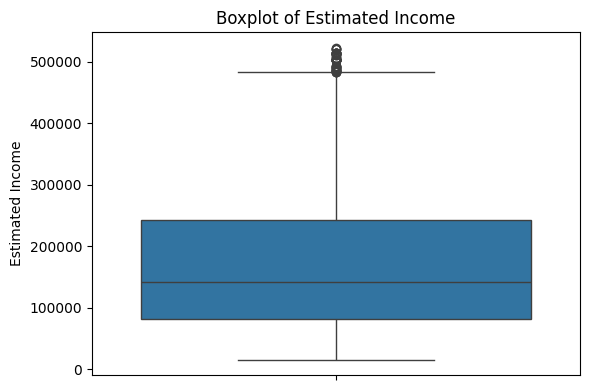

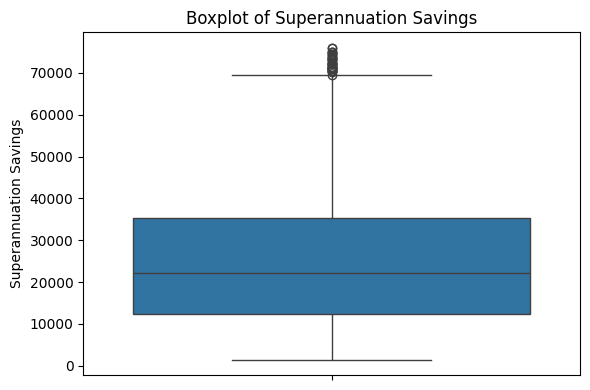

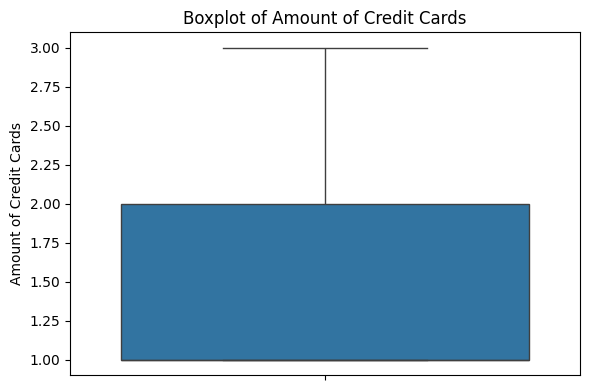

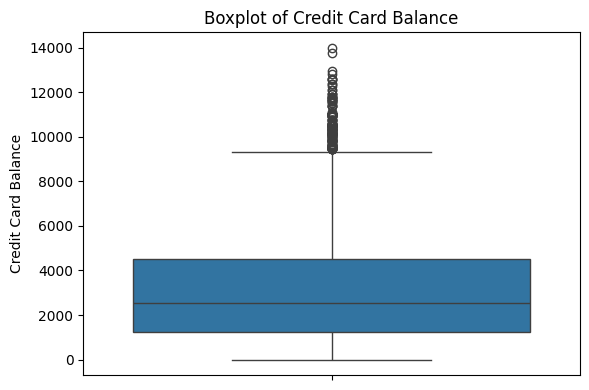

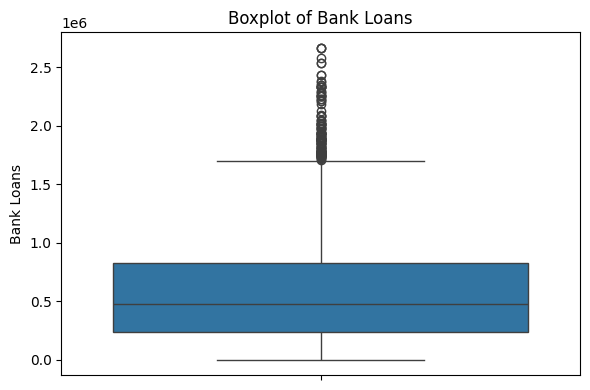

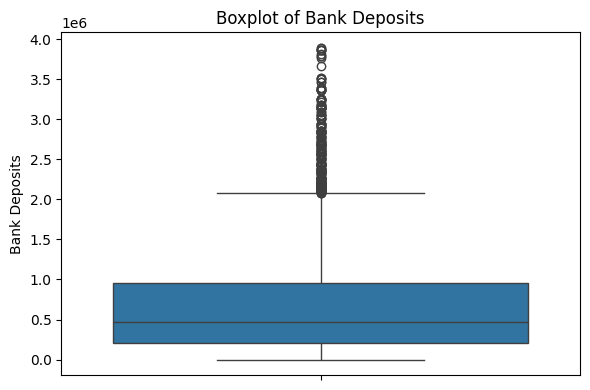

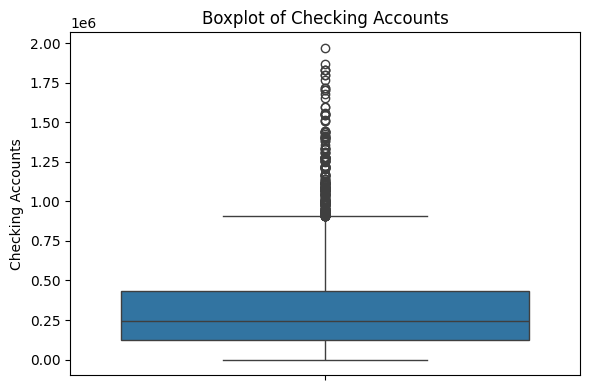

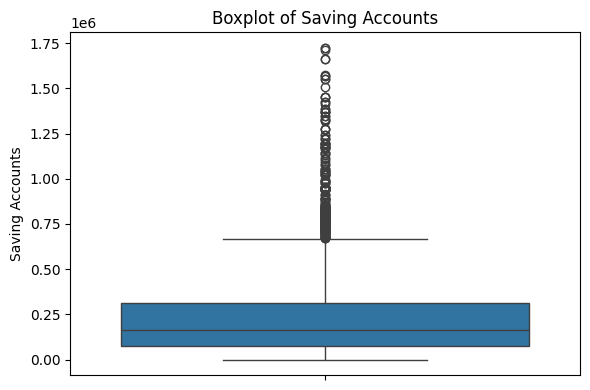

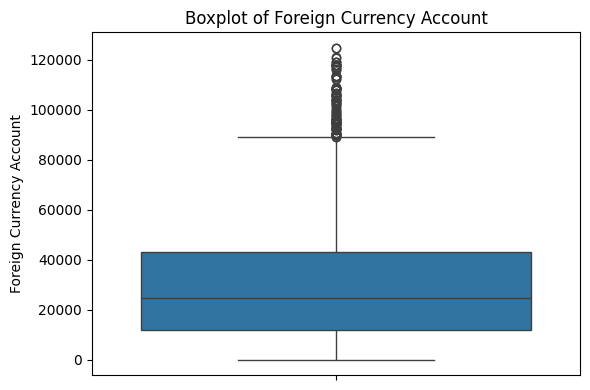

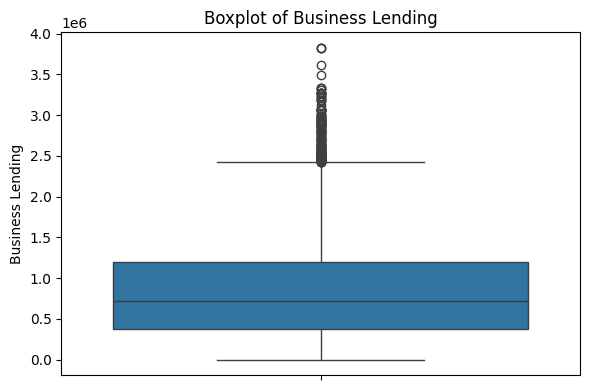

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

continuous_cols = [
    'Estimated Income', 'Superannuation Savings',
    'Amount of Credit Cards', 'Credit Card Balance',
    'Bank Loans', 'Bank Deposits', 'Checking Accounts',
    'Saving Accounts', 'Foreign Currency Account',
    'Business Lending'
]

for col in continuous_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()


accdoding this box plot 90% perple income is extrame so they can apply high amount loan  easliy which make sense  

also we can apply discreatizaation technique it not matter that whetter data is normaly distributed or not


# Replace some value  form last 3 column 

In [34]:
df['BRId']=df['BRId'].replace({1:"Retail",2:"Institutional",3:"Private Bank",4:"Commercial"})

df["GenderId"].replace({1:"Male",2:'Female'})


iaid_mapping = {
    1: "Victor Dean",
    2: "Jeremy Porter",
    3: "Ernest Knight",
    4: "Eric Shaw",
    5: "Kevin Kim",
    6: "Victor Rogers",
    7: "Eugene Cunningham",
    8: "Joe Carroll",
    9: "Steve Sanchez",
    10: "Lawrence Sanchez",
    11: "Peter Castillo",
    12: "Victor Gutierrez",
    13: "Daniel Carroll",
    14: "Carl Anderson",
    15: "Nicholas Ward",
    16: "Fred Bryant",
    17: "Ryan Taylor",
    18: "Sean Vasquez",
    19: "Nicholas Morrison",
    20: "Jack Phillips",
    21: "Juan Ramirez",
    22: "Gregory Boyd"
}

# Replace IAId numbers with names
df['IAId'] = df['IAId'].replace(iaid_mapping)

# Check result
df[['IAId']].head()


,IAId
0,Victor Dean
1,Jeremy Porter
2,Ernest Knight
3,Eric Shaw
4,Kevin Kim


### EDA start here

# univarint start form here  (EDA)

In [35]:
df[continuous_cols].describe()


,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending
count,5000.00000,5000.000000,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03
mean,171032.37233,25390.513660,1.468200,3168.391760,5.892770e+05,6.797676e+05,3.216997e+05,2.313483e+05,30298.636700,8.715291e+05
std,111003.13083,16248.081459,0.678735,2499.835551,4.566728e+05,6.530541e+05,2.799219e+05,2.273421e+05,23318.175025,6.471848e+05
min,15919.48000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00
25%,82613.53250,12403.937500,1.000000,1244.817500,2.381292e+05,2.065831e+05,1.209128e+05,7.481401e+04,12043.072500,3.745695e+05
50%,142530.31000,22226.820000,1.000000,2560.165000,4.797934e+05,4.692797e+05,2.462424e+05,1.639796e+05,24733.710000,7.173736e+05
75%,242779.90000,35272.930000,2.000000,4518.412500,8.247386e+05,9.550041e+05,4.348749e+05,3.133008e+05,42886.550000,1.193773e+06
max,522330.26000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06


In [36]:
discrete_cols = [
    'Age',
    'Location ID',
    'Joined Bank',
    'Banking Contact',
    'Nationality',
    'Occupation',
    'Fee Structure',
    'Loyalty Classification',
    'Amount of Credit Cards'
]
cat_cols = [
    'Joined Bank', 'Banking Contact', 'Nationality',
    'Occupation', 'Fee Structure', 'Loyalty Classification',
    
]

df[cat_cols].describe(include='object')




,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification
count,5000,5000,5000,5000,5000,5000
unique,2579,49,5,195,3,4
top,07-06-2009,Ernest Rivera,European,Recruiter,High,Jade
freq,10,131,2229,45,2455,2185


In [37]:
for col in ["BRId","GenderId","IAId"]:
    print(df[col].value_counts())



BRId
Private Bank     2273
Retail           1075
Institutional     837
Commercial        815
Name: count, dtype: int64
GenderId
2    2541
1    2459
Name: count, dtype: int64
IAId
Jeremy Porter        317
Nicholas Ward        304
Eric Shaw            301
Victor Gutierrez     299
Steve Sanchez        298
Ernest Knight        296
Carl Anderson        294
Daniel Carroll       292
Victor Dean          285
Joe Carroll          283
Lawrence Sanchez     279
Peter Castillo       263
Gregory Boyd         159
Eugene Cunningham    155
Sean Vasquez         153
Jack Phillips        151
Juan Ramirez         148
Victor Rogers        148
Ryan Taylor          148
Nicholas Morrison    146
Fred Bryant          144
Kevin Kim            137
Name: count, dtype: int64


3 brid :banking relation ship  mean sprivate moslty use to get loan or they provde laon  maximum

gender  both equal

and
2  iaid means advisor use most and 15  mostly all eqal

In [38]:
# now i will perform discretization process  on estimated incoem column 
bins=[0,100000,300000,float("inf")] 
labels=["Low","Med","High"]
df['Income Band'] = pd.cut(
    df['Estimated Income'],
    bins=bins,
    labels=labels,
    right=False
)



<Axes: xlabel='Income Band', ylabel='count'>

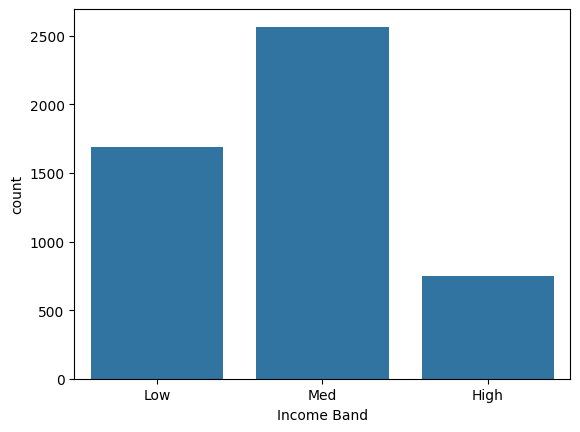

In [39]:
sns.countplot(x=df["Income Band"])

income band medium icome is high  100k -300k

In [40]:
df.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['Client ID', 'Name', 'Age', 'Location ID', 'Joined Bank',
       'Banking Contact', 'Nationality', 'Occupation', 'Fee Structure',
       'Loyalty Classification', 'Estimated Income', 'Superannuation Savings',
       'Amount of Credit Cards', 'Credit Card Balance', 'Bank Loans',
       'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
       'Foreign Currency Account', 'Business Lending', 'Properties Owned',
       'Risk Weighting', 'BRId', 'GenderId', 'IAId', 'Income Band'],
      dtype='object')>

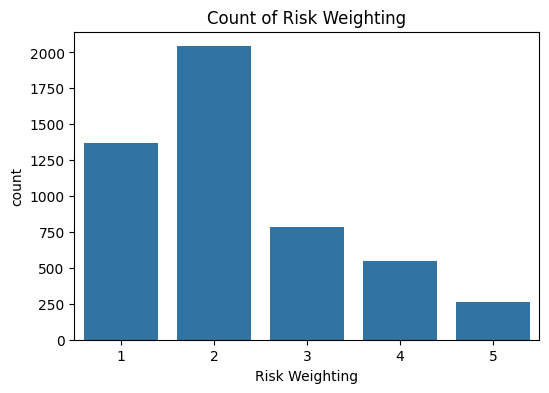

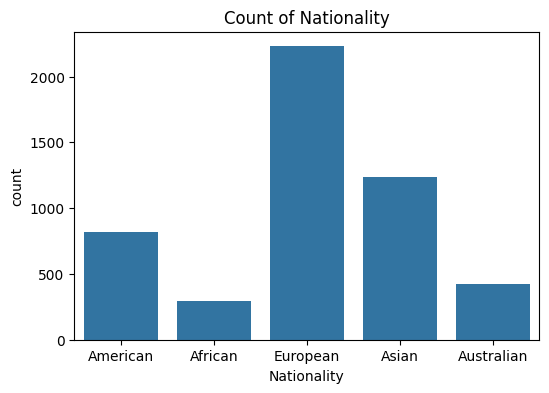

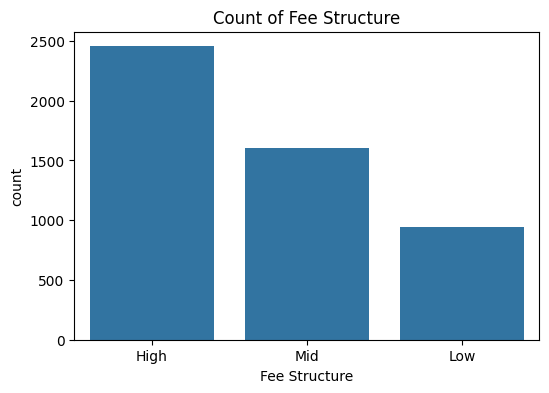

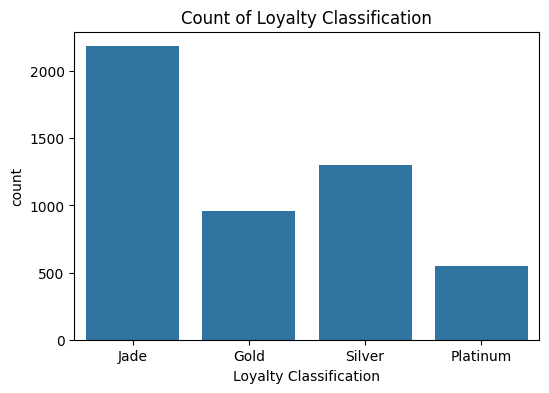

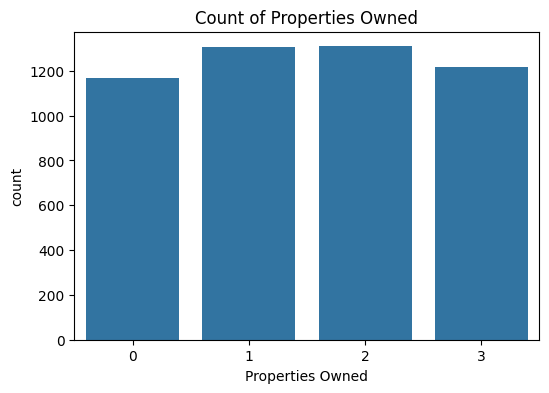

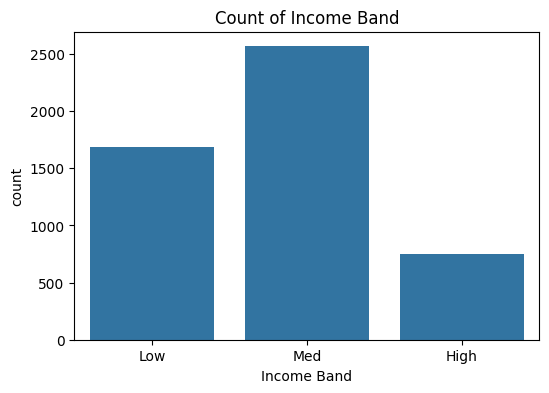

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in ["Risk Weighting","Nationality","Fee Structure","Loyalty Classification","Properties Owned","Income Band"]:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count of {col}")
    plt.show()


observation 

Risk Weighting:

Rating   |	Meaning	Risk      |      Level	              |         Real-life 

1           |	Very Safe	      |   Lowest Risk	| Stable job, high salary, no loans, perfect credit

2	        |       Safe	           |        Low Risk	  |     Good income, few loans, timely payments

3	    |         Moderate	     |    Medium Risk	|Average income, some delays in bills

4	     |          Risky	          |     High Risk	     | Irregular income, loan defaults, payment issues

5	      |      Very Risky       |   	Highest Risk	| High debt, loan defaults, fraud alerts, unstable financials



# here we see maximum  rating  is 2  meansing  safe



Nationality:Nationality column shows that European individuals are the most frequent in the dataset.

occupation :each  job role is 5000 unique  job role that why we dont perform any univartient anyliese


count of fee sturcture: high  maximum pay high fee amount

count of loyality calssifcation : jade (mid level)


1️⃣ Silver (lowest)


2️⃣ Jade / Ruby / Emerald (mid-level)


3️⃣ Gold (high)


4️⃣ Platinum / Diamond (highest)



properties: 2 properties is higherst

income : maximum customer come in midiaum size income



### BIVARIENT EDA (Risk weighting) is target

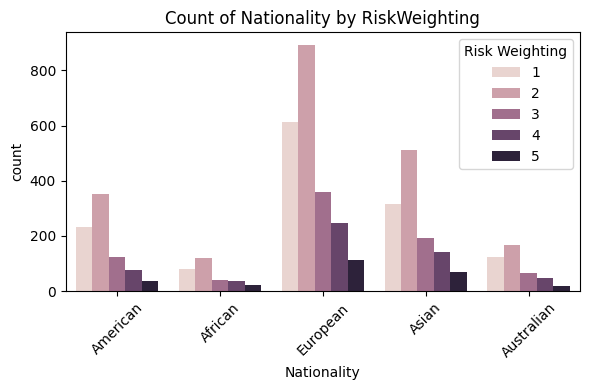

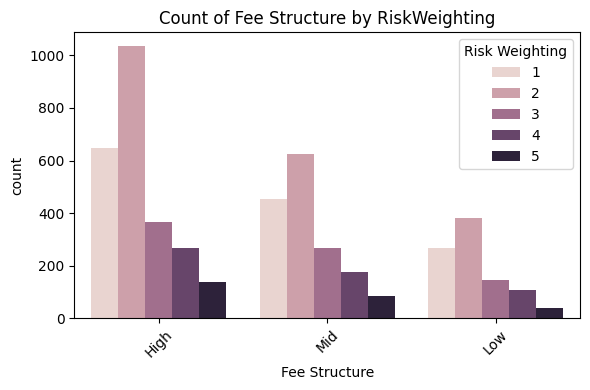

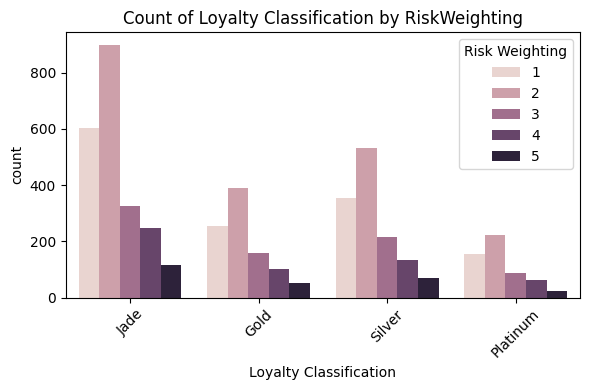

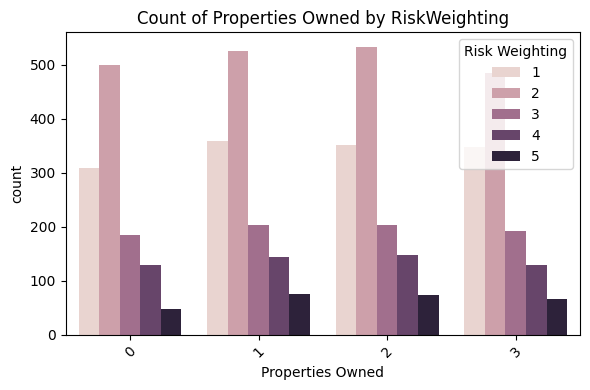

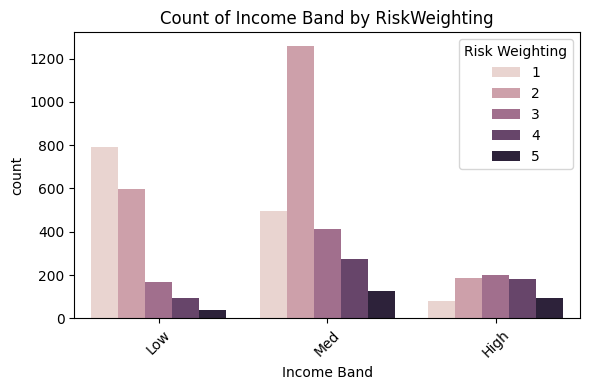

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = ["Nationality","Fee Structure","Loyalty Classification","Properties Owned","Income Band"]

for col in cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Risk Weighting")
    plt.title(f"Count of {col} by RiskWeighting")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


Risk Weighting:

Rating   |	Meaning	Risk      |      Level	              |         Real-life 

1           |	Very Safe	      |   Lowest Risk	| Stable job, high salary, no loans, perfect credit

2	        |       Safe	           |        Low Risk	  |     Good income, few loans, timely payments

3	    |         Moderate	     |    Medium Risk	|Average income, some delays in bills

4	     |          Risky	          |     High Risk	     | Irregular income, loan defaults, payment issues

5	      |      Very Risky       |   	Highest Risk	| High debt, loan defaults, fraud alerts, unstable financials


Nationality vs Riskweighting
 European is  only the country  very safe and safe  overall low risk is their

 fee structure vs riskweighting 
 very safe (2 Rating) is high hai


 loyallity is jade level is very safe

 count properties basicaly does giv ebig differnce


income band medium and safe is their

 




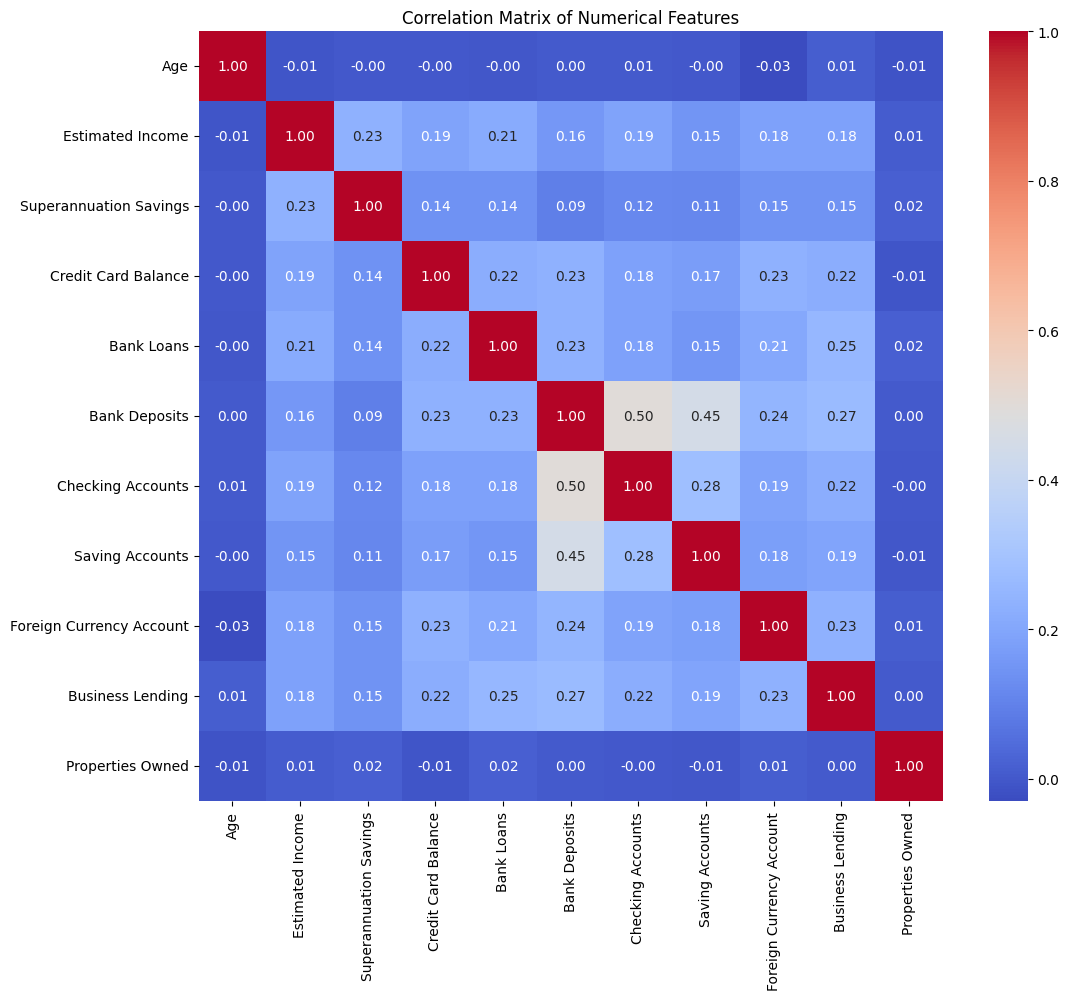

In [43]:
# Select numerical columns for correlation analysis
numerical_cols = ['Age', 'Estimated Income', 'Superannuation Savings', 'Credit Card Balance',
                  'Bank Loans', 'Bank Deposits', 'Checking Accounts', 'Saving Accounts',
                  'Foreign Currency Account', 'Business Lending', 'Properties Owned']

# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Correlation Kyu Apply Kiya? (Why apply correlation)

Correlation apply karte hain jab:

✔ Hume pata lagana ho ki do numerical variables ek dusre se kitne related hain.

Example:

Saving Accounts ↑ to Bank Deposits ↑?

Loans ↑ to Defaults ↑?

Income ↑ to Credit Card Spending ↑?

✔ Multicollinearity check karne ke liye (Machine Learning me important)

Agar do variables 0.8+ correlation rakhte hain →
model them ko duplicate samjhta hai → error hota hai.

✔ Feature selection karne ke liye

Kaunse columns useful hai
Kaunse remove hone chahiye
Kaunse combined effect dete hain

✅ 2. Correlation Kab Apply Karte Hain? (When to apply)

Correlation tab use hota hai jab data numerical ho:

Data Type	Correlation Allowed?
Numeric (Age, Income, Deposits)	✔ Yes
Binary (0/1, Yes/No)	✔ Yes
Category (Male/Female, City)	❌ No (One-hot encoding required)
✅ 3. Correlation Value Range (Scale)

Correlation value −1 to +1 ke beech hoti hai:

Range	Meaning	Strength
0.80 to 1.00	Very strongly related	🔥 Strong
0.50 to 0.79	Moderately related	⭐ Medium
0.30 to 0.49	Weak relation	🟦 Weak
0.00 to 0.29	Very weak / No relation	❄️ Very Weak
−1.00 to −0.80	Strong negative	🔥 Strong
−0.79 to −0.50	Medium negative	⭐ Medium
−0.49 to −0.30	Weak negative	🟦 Weak
−0.29 to 0.00	Very weak	❄️ Very Weak
✅ 4. Tumhare Dataset se Observations (Insights from your heatmap)
🔍 Observation 1: No strong correlation (above 0.8) found

→ Tumhare dataset me koi bhi pair strongly related nahi.
→ Multicollinearity low hai (Good for machine learning).

🔍 Observation 2: Sabse Strong Jo Mila (Medium Strength)
✔ Bank Deposits ↔ Checking Accounts = 0.50

Interpretation:

Jinke checking accounts zyada hain

Unke deposits bhi medium level tak increase hote hain.

Yeh moderate linear relationship hai.

🔍 Observation 3: Saving Accounts ↔ Bank Deposits = 0.45

Interpretation:

Saving account balance badhe, to deposits bhi likely badhenge.

Yeh weak-to-medium relationship hai.

🔍 Observation 4: Baaki sab features almost unrelated

Most values 0.00 to 0.23 →
This means:

Loan amount does NOT depend on income strongly

Credit cards count does NOT depend on deposits

Age does NOT predict saving/checking balances

Defaults does NOT relate strongly to family income

Yeh sab weak hai.

🎯 Final Insights Summary (2–3 lines for report)

Aise likh diya karo:

“Correlation analysis was performed to understand relationships among numerical variables and to check multicollinearity.
The dataset shows mostly weak correlations, indicating independent features.
The strongest correlation observed is between Checking Accounts and Bank Deposits (0.50), representing a moderate positive relationship.”

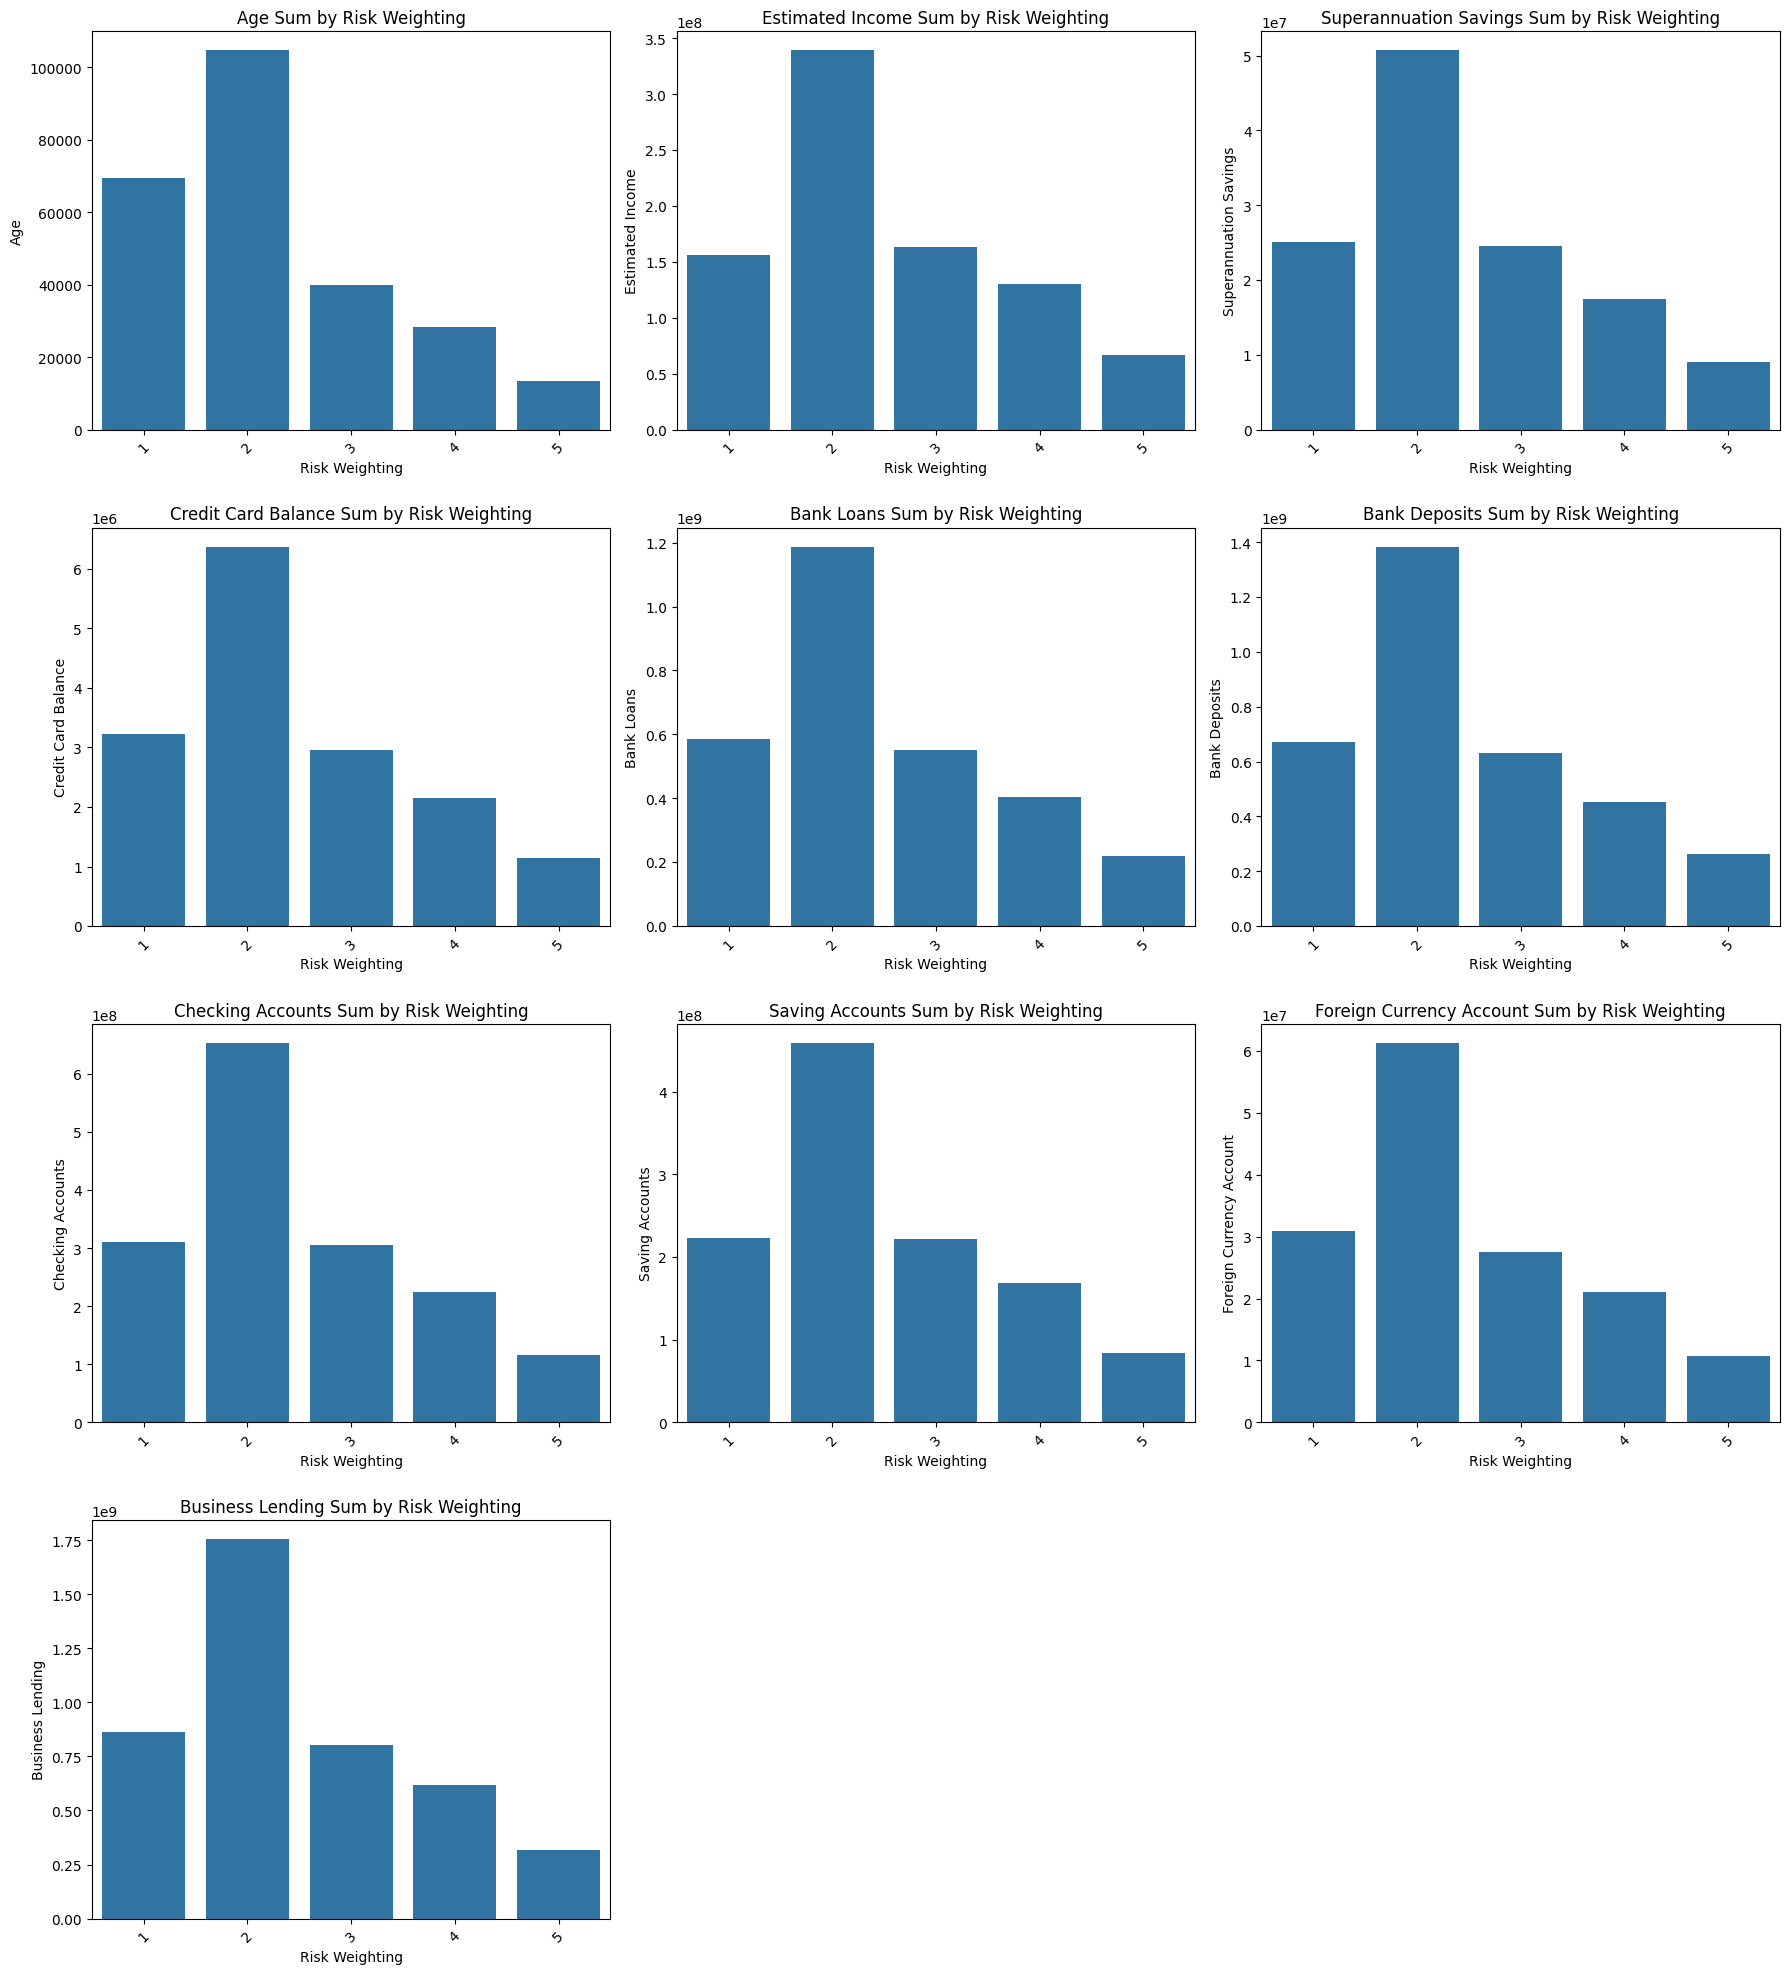

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# List of numerical columns (exact names from your DataFrame)
numerical_cols = [
    'Age', 
    'Estimated Income', 
    'Superannuation Savings', 
    'Credit Card Balance',
    'Bank Loans', 
    'Bank Deposits', 
    'Checking Accounts', 
    'Saving Accounts',
    'Foreign Currency Account', 
    'Business Lending'
]

# Convert numerical columns to numeric type
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Main figure
plt.figure(figsize=(18, 20))

# Loop through each column and create bar plots
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    
    # FIX: count estimator and ci removed for speed
    sns.barplot(
        data=df,
        x='Risk Weighting',
        y=col,
        estimator=np.sum,
        errorbar=None
    )
    
    plt.title(f"{col} Sum by Risk Weighting")
    plt.xticks(rotation=45)
    plt.xlabel("Risk Weighting")
    plt.ylabel(col)

plt.tight_layout()
plt.show()


Final Observation (English – Correct & Clear)
1) Risk Weighting = 2

This group shows the highest total values across all metrics
(Income, Loans, Deposits, Credit Card Balance, Savings, Checking, Business Lending).
➡️ These are your top, high-value, high-activity customers.

2) Risk Weighting = 1 and 3

Both groups show medium-level totals.
➡️ These customers are average or mid-value — not too high, not too low.

3) Risk Weighting = 5

This group consistently shows the lowest totals across every metric.
➡️ These are your low-value, low-activity customers.



Risk 2 customers contribute the most money; Risk 1 & 3 are moderate; Risk 5 contributes the least.

In [45]:
df.columns.to_list()

['Client ID',
 'Name',
 'Age',
 'Location ID',
 'Joined Bank',
 'Banking Contact',
 'Nationality',
 'Occupation',
 'Fee Structure',
 'Loyalty Classification',
 'Estimated Income',
 'Superannuation Savings',
 'Amount of Credit Cards',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Checking Accounts',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending',
 'Properties Owned',
 'Risk Weighting',
 'BRId',
 'GenderId',
 'IAId',
 'Income Band']

Income vs Bank Loans — richer people less risk?

Credit Card Balance vs Risk Weighting

Bank Deposits vs Risk Weighting


Properties Owned vs Risk Weighting

Saving & Checking Accounts vs Risk

Business Lending vs Risk

Foreign Currency Account vs Risk

Age vs Risk Weighting

<Axes: xlabel='Income Band', ylabel='Bank Loans'>

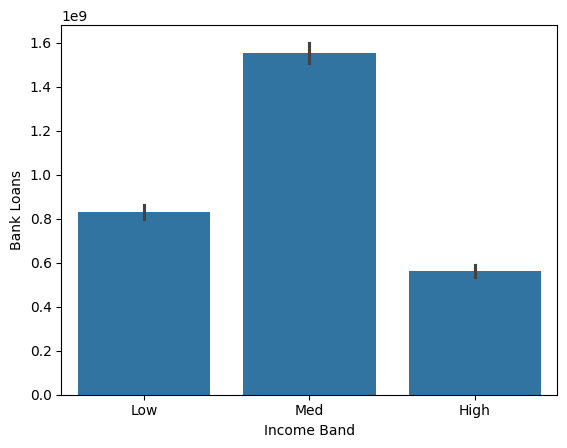

In [46]:
#Income vs Bank Loans — richer people less risk?


sns.barplot(y='Bank Loans', x='Income Band', data=df, estimator=np.sum)


<Axes: xlabel='Risk Weighting', ylabel='Credit Card Balance'>

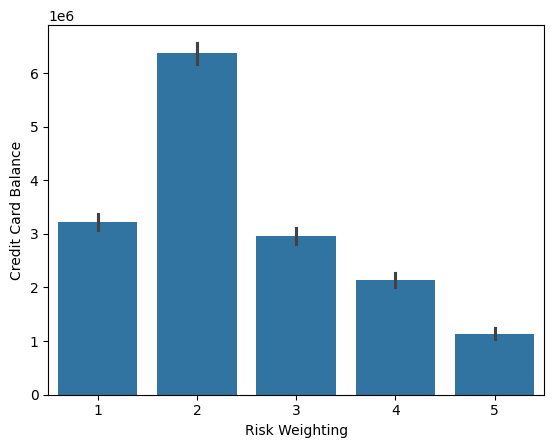

In [47]:
sns.barplot(y='Credit Card Balance', x='Risk Weighting', data=df, estimator=np.sum)

<Axes: xlabel='Risk Weighting', ylabel='Properties Owned'>

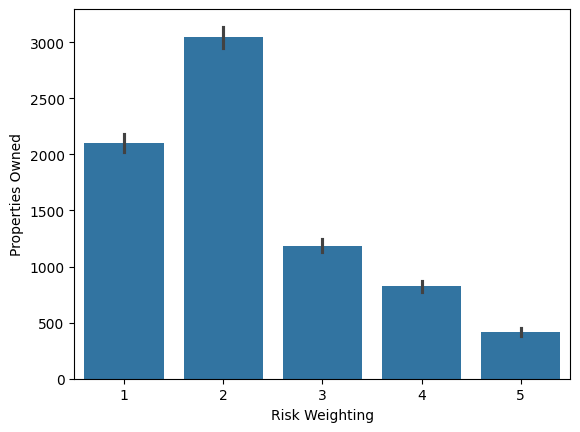

In [48]:
sns.barplot(y='Properties Owned', x='Risk Weighting', data=df, estimator=np.sum)


properties owned vs risk weighting  2  is high  means safe and second postion 1 very safe

bank deposit vs  risk weighting     2 is high very safe

risk weighting vs credit card   2 is high means safe and second postion 1 means very safe

properties owned vs risk weighting  2  is high  means safe and second postion 1 very safe

bank deposit vs  risk weighting     2 is high very safe

income band  vs bank loan Medium (income band )  is high for bank loan means middle class perople take high loan and   second postion is low  income band  and last high incoem band

income band  vs bank loan Medium (income band )  is high for bank loan means middle class perople take high loan and   second postion is low  income band  and last high incoem band

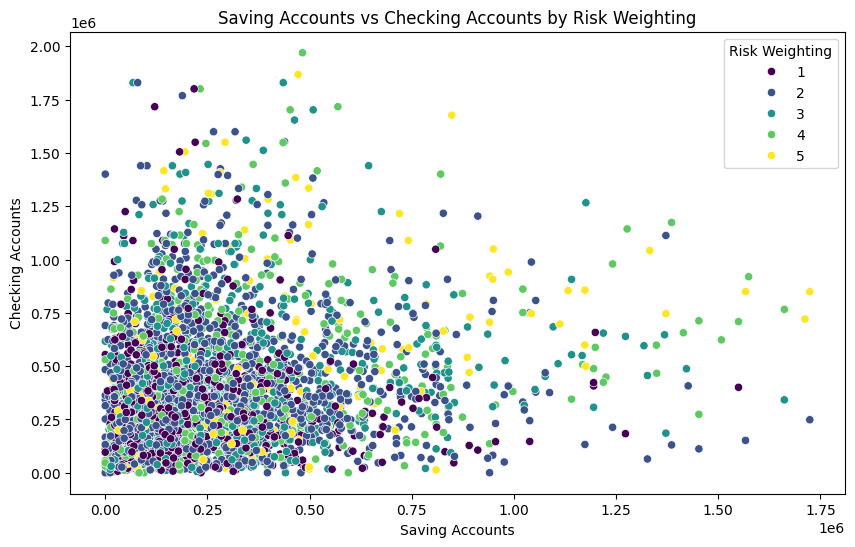

In [49]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x='Saving Accounts',
    y='Checking Accounts',
    hue='Risk Weighting',
    palette='viridis'
)
plt.title("Saving Accounts vs Checking Accounts by Risk Weighting")
plt.show()



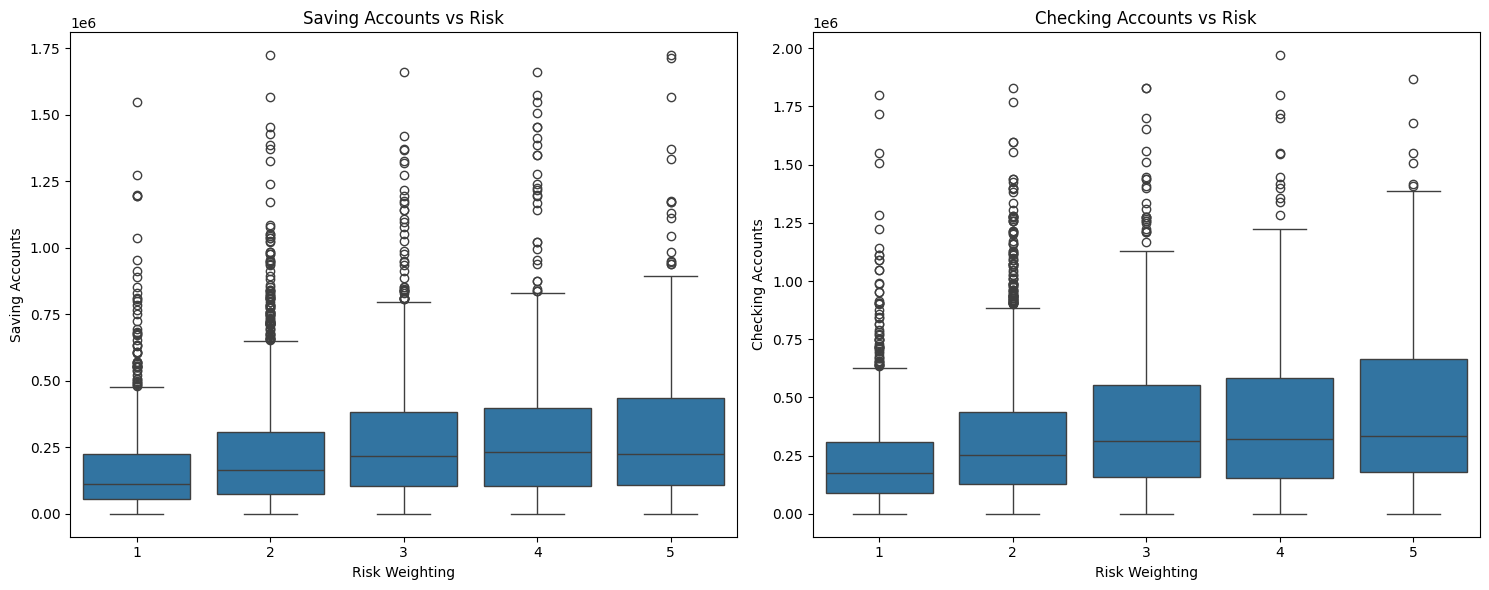

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(15,6))

sns.boxplot(data=df, x='Risk Weighting', y='Saving Accounts', ax=axes[0])
axes[0].set_title("Saving Accounts vs Risk")

sns.boxplot(data=df, x='Risk Weighting', y='Checking Accounts', ax=axes[1])
axes[1].set_title("Checking Accounts vs Risk")

plt.tight_layout()
plt.show()


Final Conclusion (Simple English, 5 lines, example included)

When Saving Accounts increase, Checking Accounts also increase — both grow together (like two buckets filled by the same customer).

Risk Weighting does NOT form any clear separate pattern — all risk groups are mixed together in the plot.

This means saving & checking balance does not strongly decide customer risk level.

Example: A customer with high savings can still be medium or high risk if loans or payments are bad.

Final point — Savings + Checking = good financial activity, but not enough to judge risk alone

# final conclusion


1. Overall Customer Risk Profile

Most customers fall under Risk Rating = 2 (Safe) → good income, stable behaviour.

Risk 1 & Risk 3 customers are mid-level and show average activity.

Risk 5 shows the lowest deposits, loans, savings → highest risk group.

Conclusion: The bank’s customer base is mostly low-risk.

✅ 2. Key Variable Relationships
2.1 Income Band vs Bank Loans

Medium-income customers take the highest loans.
Example: Middle-class people borrow more for home/car.

Low income = second highest loans.

High income = lowest loans.

Conclusion: Loan demand is highest in the middle-income segment.

2.2 Credit Card Balance vs Risk Weighting

Risk 2 (Safe) has the highest credit card balance.

Second highest = Risk 1 (Very Safe).

Conclusion: People with better financial discipline use credit cards more responsibly.

2.3 Bank Deposits vs Risk Weighting

Risk 2 group has the highest deposits.

Conclusion: Customers who maintain strong deposits are safer borrowers.

2.4 Loyalty Classification vs Risk

Jade (mid-level loyalty) is the most common.

Jade customers fall mostly in safe categories (1 & 2).

Conclusion: Loyal customers = Lower risk.

2.5 Properties Owned vs Risk

Customers owning 2 properties is the largest segment.

These mostly fall in Risk 1 & 2.

Conclusion: More properties → better financial stability → lower risk.

2.6 Saving Accounts + Checking Accounts vs Risk

Savings ↑ → Checking ↑ (both grow together).

But risk rating does NOT change clearly with these two.

Example: A customer with high saving can still be risky if they default on loans.

Conclusion: Saving + Checking alone cannot predict risk.

2.7 Foreign Currency Account vs Risk

No strong pattern.

Conclusion: FCA does not affect customer risk much.

2.8 Business Lending vs Risk

Medium relation only.

Conclusion: Business lending amount does not directly define customer risk.

2.9 Age vs Risk

Risk ratings are evenly spread across age groups.

Conclusion: Age does not strongly influence risk.

✅ 3. Correlation Summary

No pair above 0.8, meaning no multicollinearity → good for ML.

Strongest relation = Checking Accounts vs Bank Deposits (0.50).

Most other variables = weak relationships.

✅ 4. Final Overall Conclusion 

Most customers are Safe (Risk 2) — stable income, good deposits, responsible activity.

Risk 5 customers are few but highest danger due to low deposits and weak behaviour.

Income, deposits, credit card balance, and properties strongly separate safe vs risky customers.

Savings & Checking accounts increase together but do not decide risk alone.

Middle-income customers take the highest loans → main lending target but must be monitored.

🔥 5. Final Recommendation 
inal Recommendations (Very Simple Language):

Give loans mainly to Risk 1 & Risk 2 customers
(They are safe, regular income, good payment history.)

For Risk 4 & 5 customers, check everything properly
(Income proof, loan history, property documents — because they miss payments more.)

Medium-income customers take the highest loans,
so bank should target them for home loan, personal loan, etc.

Deposits + Credit Card behaviour show customer discipline.
Higher deposits + low credit card balance = more trustworthy.

Savings and Checking accounts are not enough to judge risk,
so final decision must include loans + repayment behaviour.

Final Conclusion (Simple Language – Recruiter ko samjhane layak)

Risk 2 customers sabse safe aur sabse strong financial activity wale hain.
– Inke savings, deposits, loans sab balanced hote hain. Bank ke liye best customers.

Risk 1 & Risk 3 customers average hain.
– Neither too good, neither too bad. Normal daily banking customers.

Risk 5 customers sabse risky hain.
– Inka income low hota hai, deposits kam, aur loan / payment issues zyada.

Savings aur Checking accounts ek sath increase hote hain
– Example: Agar customer saving me paisa rakhta hai, usually checking me bhi rakhta hai.
– But risk level predict nahi hota only savings-checking se.

Middle-income customers sabse zyada loans lete hain.
– Example: Middle class log home loan, personal loan, car loan zyada lete hain.

Credit card balance highest Risk 2 group me dikha
– Meaning: Safe customers credit card use to karte hain but responsibly pay bhi kar dete hain.

Properties owned se risk zyada effect nahi hota
– 1 ya 2 property hone se risk stable hi raha.

Deposits vs Risk me bhi safe customers (Risk 2) top par hain
– Matlab inke deposits high, payment discipline strong.

In [51]:
df.columns.to_list()

['Client ID',
 'Name',
 'Age',
 'Location ID',
 'Joined Bank',
 'Banking Contact',
 'Nationality',
 'Occupation',
 'Fee Structure',
 'Loyalty Classification',
 'Estimated Income',
 'Superannuation Savings',
 'Amount of Credit Cards',
 'Credit Card Balance',
 'Bank Loans',
 'Bank Deposits',
 'Checking Accounts',
 'Saving Accounts',
 'Foreign Currency Account',
 'Business Lending',
 'Properties Owned',
 'Risk Weighting',
 'BRId',
 'GenderId',
 'IAId',
 'Income Band']

In [53]:


import pandas as pd

df.to_excel("new_data_set.xlsx", index=False)

